<a href="https://colab.research.google.com/github/Akash-muneshwar/Deep-learning/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 179MB/s]
100% 1.06G/1.06G [00:07<00:00, 151MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from keras.preprocessing import image_dataset_from_directory
from tensorflow import keras


In [6]:
# Load data
train_ds = image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)
)

validation_ds = image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Load the pre-trained VGG16 model, excluding the top (classification) layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers to prevent accidental modification during training
vgg16.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


In [8]:
# Flatten the output from VGG16 to prepare it for dense layers
x = vgg16.output
x = Flatten()(x)

# Add dense layers for classification (cat or dog)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

# Create the final model using VGG16's output and the added classifier
model = Model(inputs=vgg16.input, outputs=predictions)

# Compile the model for training (optimizer, loss function, metrics)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,         # Stop training after 5 epochs with no improvement
    restore_best_weights=True  # Restore weights from the best epoch

)

In [11]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds, callbacks=[early_stopping])

Epoch 1/10
625/625 [==============================] - 137s 197ms/step - loss: 0.5736 - accuracy: 0.9426 - val_loss: 0.1411 - val_accuracy: 0.9472
Epoch 2/10
625/625 [==============================] - 106s 169ms/step - loss: 0.1280 - accuracy: 0.9644 - val_loss: 0.1034 - val_accuracy: 0.9628
Epoch 3/10
625/625 [==============================] - 106s 169ms/step - loss: 0.0936 - accuracy: 0.9726 - val_loss: 0.1258 - val_accuracy: 0.9608
Epoch 4/10
625/625 [==============================] - 105s 168ms/step - loss: 0.0768 - accuracy: 0.9768 - val_loss: 0.0899 - val_accuracy: 0.9706
Epoch 5/10
625/625 [==============================] - 105s 168ms/step - loss: 0.0588 - accuracy: 0.9807 - val_loss: 0.1063 - val_accuracy: 0.9672
Epoch 6/10
625/625 [==============================] - 105s 168ms/step - loss: 0.0461 - accuracy: 0.9857 - val_loss: 0.0899 - val_accuracy: 0.9694
Epoch 7/10
625/625 [==============================] - 126s 201ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.1436 -

In [12]:
model.save('col_Cat.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
!pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


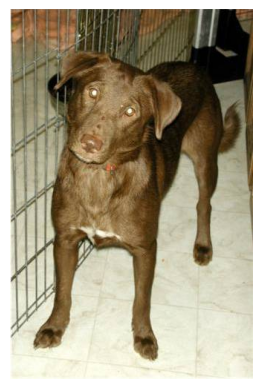

1/1 [==============================] - 1s 1s/step
Prediction: dog (Confidence: 100.00%)
Raw Prediction Value: 1.0


In [15]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib for image display

# Load the trained model
model_path = '/content/col_Cat.h5'  # Change this to the actual path of your model
model = tf.keras.models.load_model(model_path)

# Define the image size expected by the model
img_size = (224, 224)

# Specify the image path
image_path = '/content/dog.1.jpg'  # Change this to the actual path of your image

# Process the image for the model
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

# Preprocess the image for the model
img_array = np.array(image.resize(img_size))
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)

# Display the prediction result
class_names = ['Cat', 'Dog']
threshold = 0.5  # Adjust this threshold based on your needs
predicted_class = 'dog' if prediction > threshold else 'cat'
confidence = prediction.item()  # Assuming the output is a single value

print(f"Prediction: {predicted_class} (Confidence: {confidence:.2%})")
print("Raw Prediction Value:", confidence)


In [28]:
with open('app.py', 'w') as f:
      f.write("""
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

def main():
    # Load the trained model
    model_path = '/content/col_Cat.h5'
    model = tf.keras.models.load_model(model_path)

    # Define the image size expected by the model
    img_size = (224, 224)

    # Streamlit app
    st.title("Dog vs Cat Image Classifier")

    uploaded_file = st.file_uploader("Choose an image...", type="jpg")

    if uploaded_file is not None:
        # Display the uploaded image
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image.", use_column_width=True)

        # Preprocess the image for the model
        img_array = np.array(image.resize(img_size))
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make prediction
        prediction = model.predict(img_array)

        # Display the prediction result
        class_names = ['Cat', 'Dog']
        threshold = 0.5  # Adjust this threshold based on your needs
        predicted_class = 'Dog' if prediction > threshold else 'Cat'
        confidence = prediction.item()  # Assuming the output is a single value
        st.write(f"Prediction: {predicted_class} (Confidence: {confidence:.2%})")
        st.write("Raw Prediction Value:", confidence)

if __name__ == "__main__":
    main()
""")

In [29]:
!wget -q -O - ipv4.icanhazip.com

34.125.172.93


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 7f9183c96f29621


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.172.93:8501

npx: installed 22 in 2.476s
your url is: https://easy-news-enjoy.loca.lt
2024-03-04 16:30:12.447772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 16:30:12.447820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 16:30:12.449082: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 16:30:13.432072: W tensorflow/compiler/tf2tensorrt/utils/py_u